# Fake News Detection

1. A

2. B

3. C

In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix

### Load the data

In [345]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

## Fake News Database
### First view of the data

In [346]:
df_fake.head()

,title,text,class,subject,date
0,REPORTER CONFRONTS State Department Over DC Vi...,Could this guy be any more clueless? Is it tha...,NaN,Government News,"May 24, 2016"
1,Episode #154 – SUNDAY WIRE: ‘The Pro-War Left?...,Episode #154 of SUNDAY WIRE SHOW resumes this...,NaN,US_News,"September 25, 2016"
2,WATCH: Republican Senator Admits That Trumpca...,While the Affordable Care Act actually has slo...,NaN,News,"March 19, 2017"
3,DNC Chair Asks Democrat Members Of Congress To...,Debbie Wasserman-Schultz didn t ask members of...,NaN,left-news,"Dec 15, 2015"
4,"Clinton Camp Desperate, Russia Trains for WWIII","Clinton Camp Desperate, Russia Trains for WWII...",0.0,NaN,NaN


### Number of rows and columns

In [347]:
df_fake.shape

(26645, 5)

### Columns and Types

In [348]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26645 entries, 0 to 26644
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    26645 non-null  object 
 1   text     26645 non-null  object 
 2   class    3164 non-null   float64
 3   subject  23481 non-null  object 
 4   date     23481 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


## True News Database
### First view of the data

In [349]:
df_true.head()

,title,text,class,subject,date
0,Latest fire in Chinese capital kills five desp...,BEIJING (Reuters) - A fire in a southern neigh...,NaN,worldnews,"December 13, 2017"
1,Dogs hit escapees' scent at gas station near p...,(CNN) Investigators are looking at surveillanc...,1.0,NaN,NaN
2,The toughest job in American politics? Defendi...,The toughest job in politics these days is def...,1.0,NaN,NaN
3,Top Senate intelligence Democrat: 'more invest...,WASHINGTON (Reuters) - The top Democrat on the...,NaN,politicsNews,"June 7, 2017"
4,Paraguay senator with dictatorship ties to run...,ASUNCION (Reuters) - Paraguayan Senator Mario ...,NaN,worldnews,"December 18, 2017"


### Number of rows and columns

In [350]:
df_true.shape

(24588, 5)

### Columns and Types

In [351]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    24588 non-null  object 
 1   text     24588 non-null  object 
 2   class    3171 non-null   float64
 3   subject  21417 non-null  object 
 4   date     21417 non-null  object 
dtypes: float64(1), object(4)
memory usage: 960.6+ KB


## Adding a new column: giving a class to 'Fake News' and 'True News'

In [352]:
df_fake["class"] = 0
df_true["class"] = 1

In [353]:
df_true.head()

,title,text,class,subject,date
0,Latest fire in Chinese capital kills five desp...,BEIJING (Reuters) - A fire in a southern neigh...,1,worldnews,"December 13, 2017"
1,Dogs hit escapees' scent at gas station near p...,(CNN) Investigators are looking at surveillanc...,1,NaN,NaN
2,The toughest job in American politics? Defendi...,The toughest job in politics these days is def...,1,NaN,NaN
3,Top Senate intelligence Democrat: 'more invest...,WASHINGTON (Reuters) - The top Democrat on the...,1,politicsNews,"June 7, 2017"
4,Paraguay senator with dictatorship ties to run...,ASUNCION (Reuters) - Paraguayan Senator Mario ...,1,worldnews,"December 18, 2017"


In [354]:
df_fake.head()

,title,text,class,subject,date
0,REPORTER CONFRONTS State Department Over DC Vi...,Could this guy be any more clueless? Is it tha...,0,Government News,"May 24, 2016"
1,Episode #154 – SUNDAY WIRE: ‘The Pro-War Left?...,Episode #154 of SUNDAY WIRE SHOW resumes this...,0,US_News,"September 25, 2016"
2,WATCH: Republican Senator Admits That Trumpca...,While the Affordable Care Act actually has slo...,0,News,"March 19, 2017"
3,DNC Chair Asks Democrat Members Of Congress To...,Debbie Wasserman-Schultz didn t ask members of...,0,left-news,"Dec 15, 2015"
4,"Clinton Camp Desperate, Russia Trains for WWIII","Clinton Camp Desperate, Russia Trains for WWII...",0,NaN,NaN


## Merge the 'Fake News' and 'True News' Database

In [355]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head()

,title,text,class,subject,date
0,REPORTER CONFRONTS State Department Over DC Vi...,Could this guy be any more clueless? Is it tha...,0,Government News,"May 24, 2016"
1,Episode #154 – SUNDAY WIRE: ‘The Pro-War Left?...,Episode #154 of SUNDAY WIRE SHOW resumes this...,0,US_News,"September 25, 2016"
2,WATCH: Republican Senator Admits That Trumpca...,While the Affordable Care Act actually has slo...,0,News,"March 19, 2017"
3,DNC Chair Asks Democrat Members Of Congress To...,Debbie Wasserman-Schultz didn t ask members of...,0,left-news,"Dec 15, 2015"
4,"Clinton Camp Desperate, Russia Trains for WWIII","Clinton Camp Desperate, Russia Trains for WWII...",0,NaN,NaN


### Since we don't need the columns 'title', 'subject', and 'date', we dropped it


In [356]:
df = df_marge.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,class
0,Could this guy be any more clueless? Is it tha...,0
1,Episode #154 of SUNDAY WIRE SHOW resumes this...,0
2,While the Affordable Care Act actually has slo...,0
3,Debbie Wasserman-Schultz didn t ask members of...,0
4,"Clinton Camp Desperate, Russia Trains for WWII...",0


### The next fuction clean the text from extra space, special caracters, URL, and lowercase


In [357]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

### In order to clean our Database text, we apply the previous fuction to our column 'text'


In [358]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,class
0,could this guy be any more clueless is it tha...,0
1,episode of sunday wire show resumes this su...,0
2,while the affordable care act actually has slo...,0
3,debbie wasserman schultz didn t ask members of...,0
4,clinton camp desperate russia trains for wwii...,0


### Shuffling

In [359]:
df = df.sample(frac = 1)

### Reset Index: 0, 1, 2...

In [360]:
df.reset_index(inplace = True)

### Deleting Index colum

In [361]:
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,the thin skinned president elect took his angr...,0
1,washington reuters u s president donald t...,1
2,a former military intelligence officer claimed...,1
3,amsterdam reuters at least two people were...,1
4,washington reuters president barack obama ...,1


In [362]:
df.shape

(51233, 2)

## Defining the variables for the model

In [363]:
x = df["text"]
y = df["class"]

## Split the data

In [364]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Text to Vectors

In [365]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [366]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [367]:
from sklearn.metrics import plot_confusion_matrix

In [368]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

## Logistic Regression

In [369]:
from sklearn.linear_model import LogisticRegression

### Training Logistic regretion model

In [370]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [371]:
pred_LR = LR.predict(xv_test)
print(pred_LR)

[0 1 0 ... 0 0 0]


In [372]:
LR.score(xv_test, y_test)

0.9607307362011086

In [373]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6678
           1       0.96      0.95      0.96      6131

    accuracy                           0.96     12809
   macro avg       0.96      0.96      0.96     12809
weighted avg       0.96      0.96      0.96     12809



accuracy:  0.96


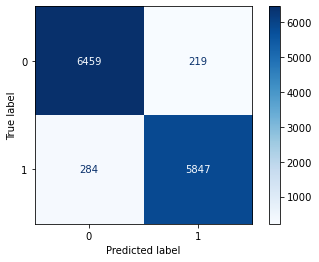

In [374]:
conf_mat_acc(LR)

The Accuracy is as follow (17508+15865)/(17508+15865+152+148)=0.99

17508: in the database the value was 0 but the prediction was 0, so it is correct!

15865: in the database the value was 1 but the prediction was 1, so it is correct! 

152: in the database the value was 0 but the prediction was 1, so it is incorrect

148: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (152 & 148) and whole the values in the diagonal*

## Decision Tree Classification

In [375]:
from sklearn.tree import DecisionTreeClassifier

### Training the Decision Tree

In [376]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [377]:
pred_dt = DT.predict(xv_test)

In [378]:
DT.score(xv_test, y_test)

0.9537044265750644

In [379]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6678
           1       0.95      0.95      0.95      6131

    accuracy                           0.95     12809
   macro avg       0.95      0.95      0.95     12809
weighted avg       0.95      0.95      0.95     12809



accuracy:  0.95


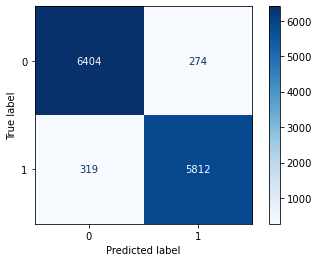

In [380]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [381]:
from sklearn.ensemble import GradientBoostingClassifier

In [382]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [383]:
pred_gbc = GBC.predict(xv_test)

In [384]:
GBC.score(xv_test, y_test)

0.9659614333671637

In [385]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6678
           1       0.99      0.94      0.96      6131

    accuracy                           0.97     12809
   macro avg       0.97      0.97      0.97     12809
weighted avg       0.97      0.97      0.97     12809



accuracy:  0.97


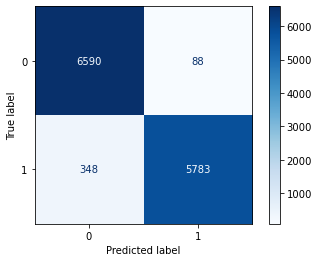

In [386]:
conf_mat_acc(GBC)

## Random Forest Classifier

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [389]:
RFC.score(xv_test, y_test)

0.9582324927785151

In [390]:
pred_RFC = RFC.predict(xv_test)

In [391]:
score = accuracy_score(y_test, pred_RFC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.82%


In [392]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6678
           1       0.97      0.94      0.96      6131

    accuracy                           0.96     12809
   macro avg       0.96      0.96      0.96     12809
weighted avg       0.96      0.96      0.96     12809



accuracy:  0.96


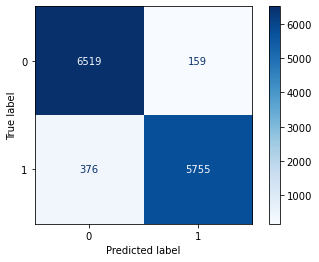

In [393]:
conf_mat_acc(RFC)

## Passive Aggressive Classifier

In [394]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [395]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [396]:
pred_PAC=PAC.predict(xv_test)
score = accuracy_score(y_test, pred_PAC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.49%


In [397]:
PAC.score(xv_test, y_test)

0.974861425560153

accuracy:  0.97


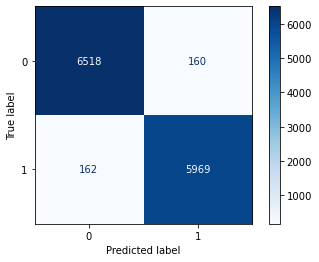

In [398]:
conf_mat_acc(PAC)

# Final Test

In [399]:
news = pd.read_csv('news.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [400]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [401]:
news['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [402]:
# Mapping and changing Label type
news['label'] = news['label'].map({'FAKE':0, 'REAL':1}).astype(int)

In [403]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [404]:
news["text"] = news["text"].apply(wordopt) 
final_x_test = news["text"]
final_xv_test = vectorization.transform(final_x_test)

In [405]:
final_y_test = news['label']

## Logistic Regression TEST

In [406]:
LR.score(final_xv_test, final_y_test)

0.8369376479873717

## Decision Tree TEST

In [407]:
DT.score(final_xv_test, final_y_test)

0.9367008681925809

## Gradient Boosting Classifier TEST

In [408]:
GBC.score(final_xv_test, final_y_test)

0.77663772691397

## Random Forest Classifier

In [409]:
RFC.score(final_xv_test, final_y_test)

0.9321231254932912